# Дисциплина «Искусственный интеллект»
# Рабочая тетрадь № 4
Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.

Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.

Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.

Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

# 1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия

Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

Функция потерь — метод наименьших квадратов

Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

Задача экраполяции

Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:

numpy - numpy.linalg.lstsq

scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

# 1.1.1 Пример
# Задача:
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

In [111]:
import numpy as np
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

# перепишем линейное уравнение y = mx +c как y Ap, где A = [[x 1]] и p = [[m],[c]]
# Построим A по x:

A = np.vstack([x,np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [112]:
#используем метод lstsq Для решиния его относильно вектра p
m, c = np.linalg.lstsq(A,y, rcond = None)[0]
print(m,c)

0.9999999999999997 -0.949999999999999


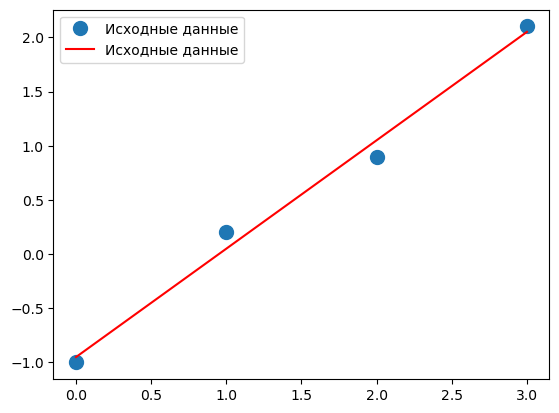

In [113]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o', label = 'Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r',label = 'Исходные данные', markersize = 10)
plt.legend()
plt.show()

# 1.1.2 Пример
# Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в 
построении эстраполяционного полинома второго порядка (параболы). Таким 
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу 
наименьших квадратов. Данные мтогут быть получены в результате 
измерений. Покажем пример генерации данных случайным образом и 
загрузки их из файла.

In [114]:
from numpy import *
from numpy.random import *

#генерируем случайные x и y

delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

# записывае данные в файл

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')




In [117]:
# читаем данные из файлов

x = fromfile('x_data.txt', float, sep ='\n')
y = fromfile('y_data.txt', float, sep= '\n')
print(x)
print(y)

[-4.83167246 -4.44159943 -2.59970905 -1.61292968 -0.82898732  0.35323908
  1.42541231  2.20166144  3.41606234  4.20233152  5.12430699]
[25.48663044 16.24502946  8.85358615  3.89225822  1.23143912 -0.11615837
  0.71903238  4.22258804  9.44501247 15.93993834 24.8679851 ]


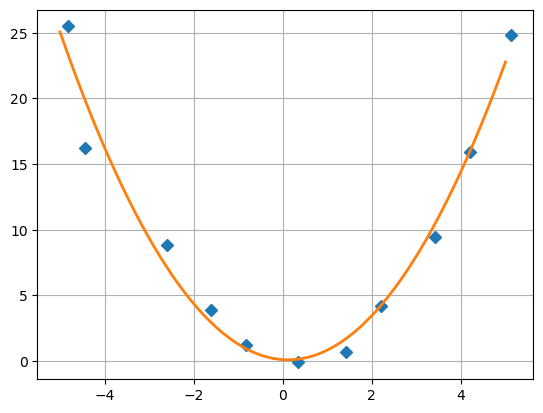

In [118]:
# нахождение коэффичиентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектро m = [x**2, x, E]
m = vstack((x**2,x,ones(11))).T
# находим коэфициенты при составляющих веткора m
s = np.linalg.lstsq(m,y,rcond = None)[0]

#на отрезе [-5,5]

x_prec = linspace(-5,5,101)
# рисуем точки

plt.plot(x,y,'D')
#рисуем кривую вида y = ax**x +bx +c, подстовляя из решения коэффициенты s[0],s[1],s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec +s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')

# 1.1.3 Пример
# Задача:
По данным предыдущего примера постройте эстраполяционного полинома 
третьего порядка
# Решение:


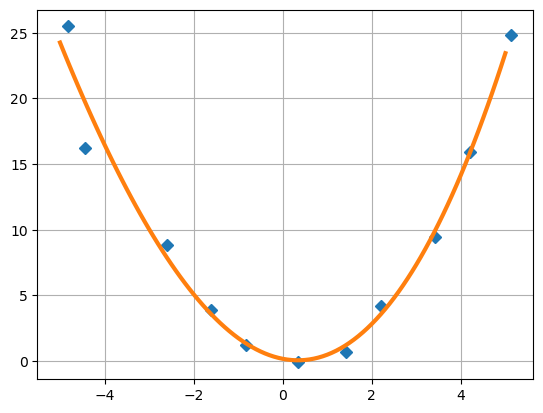

In [119]:
# Решение 
# Находждение коэффициетов функции вида y = ax^3 +bx^2 +cx+d методом наименьших квадратов
#задаем вектор m = [x**3, x, E]
m = vstack((x**3,x**2,x,ones(11))).T
# находим коэффициеты при составляющих веттора m
s = np.linalg.lstsq(m,y,rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5,5,101)
# рисуем точки
plt.plot(x,y,'D')
# рисует кривую вида y = ax^3 +bx^2 + cx +d, подставляя из решения коэффициенты s[0],s[1],s[2],s[3]
plt.plot(x_prec,s[0] * x_prec**3 + s[1]* x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

# Задание:
Представьте собственные данные и постройте эктраполяцию полиномами 
первой, второй и третьей степени.
# Решение:

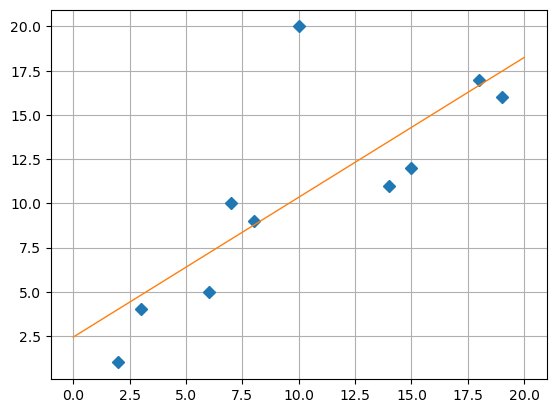

In [131]:
from numpy import *
from numpy.random import *

#генерируем случайные x и y

x = [2,3,6,7,8,14,15,19,18,10]
y = [1,4,5,10,9,11,12,16,17,20]

x = np.array(x)

M = vstack((x,ones(10))).T
s = np.linalg.lstsq(M,y,rcond = None)[0]
x_prec = linspace(0,20,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0]*x_prec +s[1],'-',lw=1)
plt.grid()





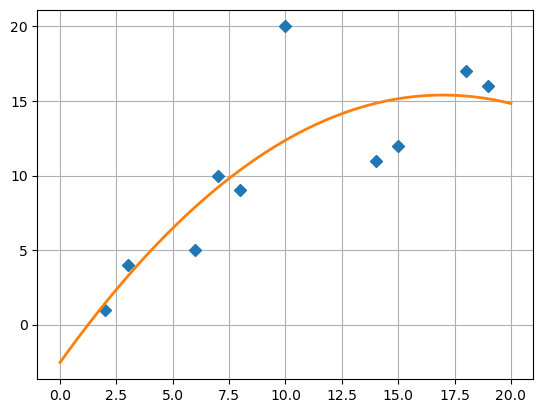

In [132]:
M = vstack((x**2,x,ones(10))).T

s = np.linalg.lstsq(M,y,rcond = None)[0]

x_prec = linspace(0,20,101)
# рисуем точки

plt.plot(x,y,'D')
#рисуем кривую вида y = ax**x +bx +c, подстовляя из решения коэффициенты s[0],s[1],s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec +s[2],'-',lw=2)
plt.grid()



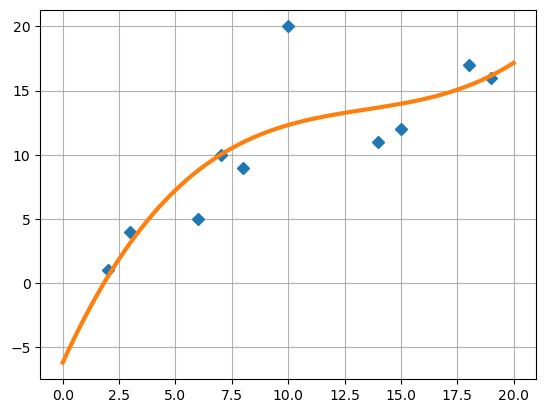

In [133]:
M = vstack((x**3,x**2,x,ones(10))).T
# находим коэффициеты при составляющих веттора m
s = np.linalg.lstsq(M,y,rcond = None)[0]

x_prec = linspace(0,20,101)

plt.plot(x,y,'D')
# рисует кривую вида y = ax^3 +bx^2 + cx +d, подставляя из решения коэффициенты s[0],s[1],s[2],s[3]
plt.plot(x_prec,s[0] * x_prec**3 + s[1]* x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()

# 1.1.4 Пример
# Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)
# Решение:


In [143]:
#Добавим шума в данные, сделанные по функции 
beta = (0.25, 0.75,0.5)
def f(x,b0,b1,b2):
    return b0 + b1 * np.exp(-b2 * x**2)

#Зададим массив точек xi
xdata = np.linspace(0,5,50)
# создаем теортически правильные значения точек yi ( без шума)
y =  f(xdata, * beta)
# зашумляем эти данные 
ydata = y+0.05 * np.random.randn(len(xdata))

print(xdata)
print(ydata)


[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.96997073 1.05766938 1.04350435 0.94951472 0.86943291 0.88111019
 0.86550379 0.84021778 0.73866598 0.75968548 0.74365861 0.65569562
 0.57468361 0.52960677 0.54431617 0.55011355 0.42271602 0.37472721
 0.32759878 0.34900514 0.40714742 0.32103532 0.2925917  0.20814266
 0.32183582 0.36294416 0.25761301 0.23449494 0.26153535 0.28927009
 0.2411677  0.27356155 0.23843105 0.18061168 0.24597877 0.30531325
 0.29828617 0.28869143 0.29786379 0.15

In [144]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)#scipy.optimize
beta_opt
#используем фукнцию для получения решения в виде коэффициентов функции f(x) для указаных xdata и ydata


array([0.25214995, 0.74897372, 0.51428748])

In [145]:
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадартичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.00019594064640654333
0.10029651666504036


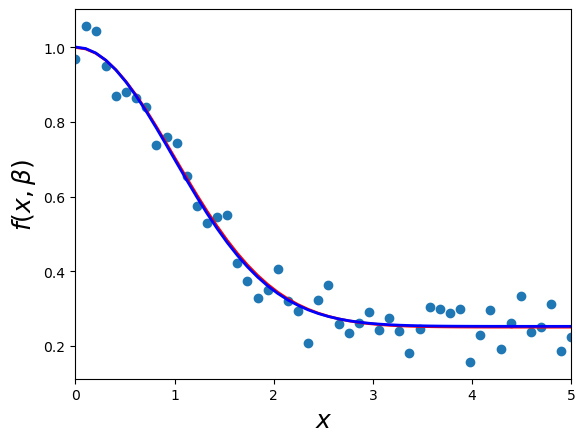

In [146]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata,y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$",fontsize = 18)
plt.show()

# 1.1.5 Пример
# Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривые вида: 
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1

[0.24997902 0.75173821]
0.0001407558200079949
0.12376805133119391


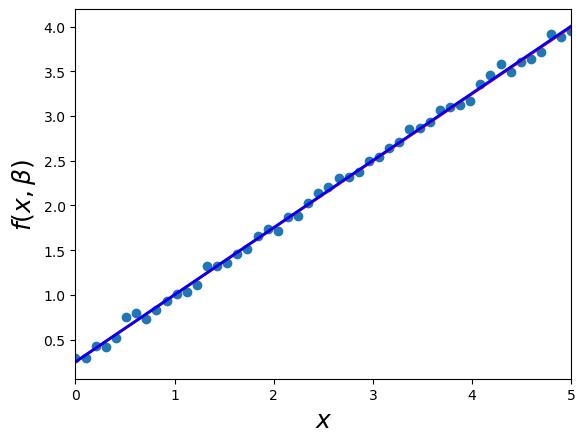

In [152]:
beta = (0.25,0.75)

def f (x, b0, b1):
    return b0+b1 * x
xdata = np.linspace(0,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw =2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize =18)
plt.show()

[0.26124408 0.7552419  0.4971329 ]
0.0002184172017380902
0.18213707371854368


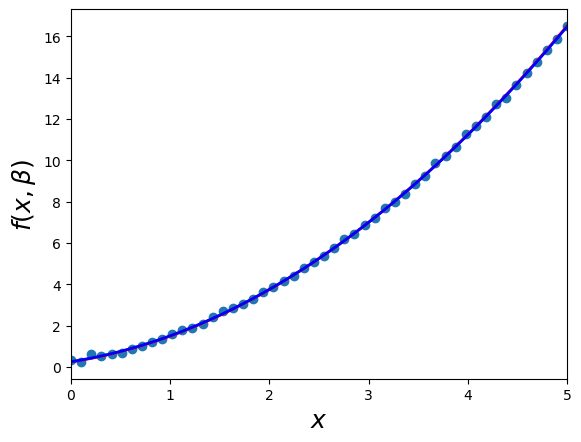

In [153]:
beta = (0.25,0.75,0.5)

def f (x, b0, b1, b2):
    return b0 + b1 * x + b2*x*x
xdata = np.linspace(0,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw =2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize =18)
plt.show()

[1.00838954 1.99681836]
3.901339505713887e-05
0.09021619417713163


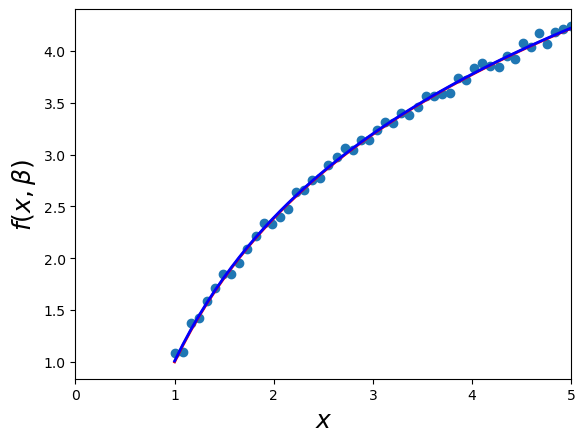

In [154]:
beta = (1,2)

def f (x, b0, b1):
    return b0+b1 * np.log(x)
xdata = np.linspace(1,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw =2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize =18)
plt.show()

[0.99594074 2.00172089]
5.8998995307432306e-06
0.11894784412029816


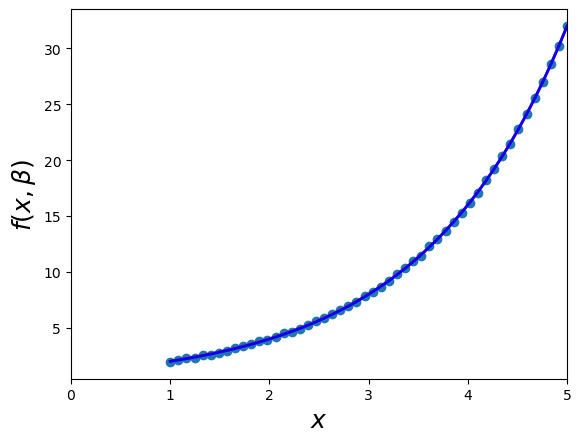

In [162]:
beta = (1,2)

def f (x, b0, b1):
    return b0 * x**b1
xdata = np.linspace(1,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw =2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize =18)
plt.show()

# Задание:
Подставьте собственные данные и поэкспериментируйте с представленными 
функциями. Проанализируйте динамику изменения данных.
# Решение:

[0.99896669 2.00071716]
0.00014428584359309094
0.1445391930079062


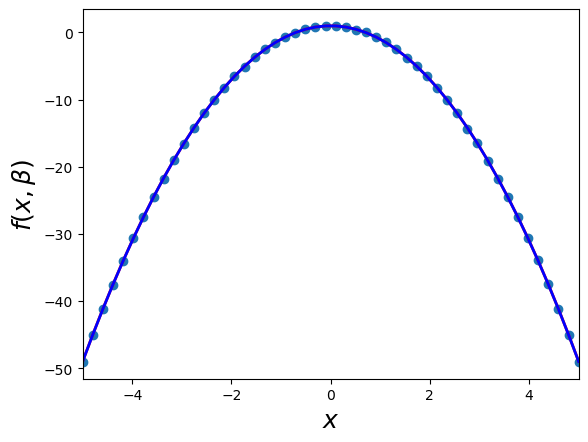

In [204]:
beta = (1,2)

def f (x, b0, b1):
    return -b1*x*x + b0
xdata = np.linspace(-5,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw =2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(-5,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize =18)
plt.show()

# 1.2. Теоретический материал – Задачи регрессии

Линейная регрессия - это широко используемый метод статистического 
анализа, который использует регрессионный анализ в математической 
статистике для определения количественной взаимосвязи между двумя или 
более переменными. Если регрессионный анализ включает две или более 
независимых переменных, а связь между зависимой и независимой 
переменными является линейной, тогда имееи дело с множественной линейной 
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного 
обучения можно использовать для реализации функций регрессии. Мы начнем 
с простой линейной регрессии с участием двух переменных, а затем перейдем к 
линейной регрессии с участием нескольких переменных.
# 1.2.1 Пример
# Задача:
Построим простую линейную регрессию в Python с использованием 
библиотеки scikit-learn

In [208]:
# импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'Учебное время' : [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,
                             3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.00],
          'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [213]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.762500,53.700000
std,1.463312,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.000000,93.000000


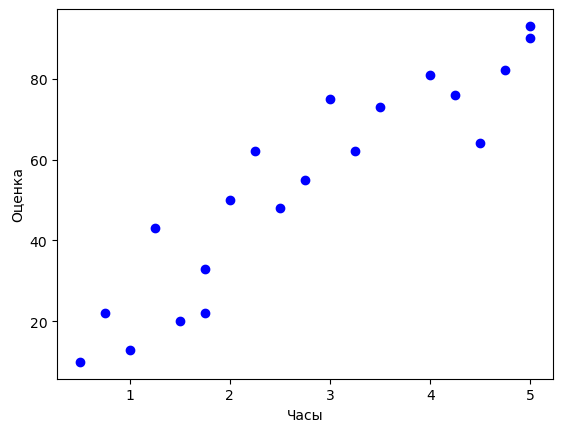

In [214]:
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию 
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки 
– это зависимые переменные, значения которых должны быть предсказаны. В 
нашем наборе всего два столбца и необходимо предсказать оценку в 
зависимости от количества часов. Чтобы извлечь атрибуты и метки, 
выполните следующий скрипт:

Решение:


In [216]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.  ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [228]:
# теперь, когда у нас есть атрибуты и метки, необходиммо разделить их на a обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающщий набор, а 20% данных - на набор тестов

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# далее можно получить алгорит линейной регрессии
# необходимо импортировать класс linearRgression, создать его экземпляр и вызывать метод fit()

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# привидем получившиеся коэффициенты для линни регрессии

print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с 
каждым затраченным часом на обучение результат экзамена повышается 
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы 
будем использовать наши тестовые данные и посмотрим, насколько точно наш 
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на 
тестовых данных необходимо выполнить следующий код:


In [229]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,90.610737
3,62,43.786302


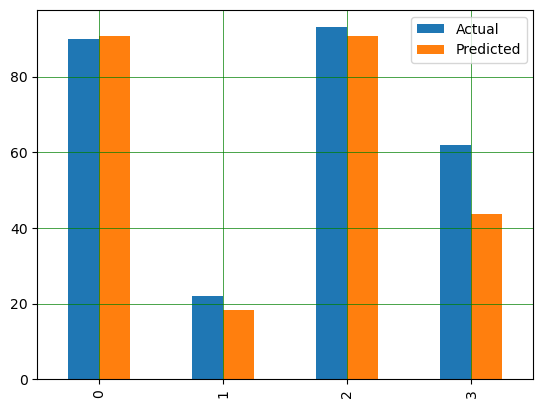

In [231]:
df.plot(kind = 'bar')
plt.grid(which='major',linestyle='-',linewidth = '0.5',color='green')
plt.grid(which = 'minor',linestyle = ':', linewidth='0.5',color = 'black')
plt.show()


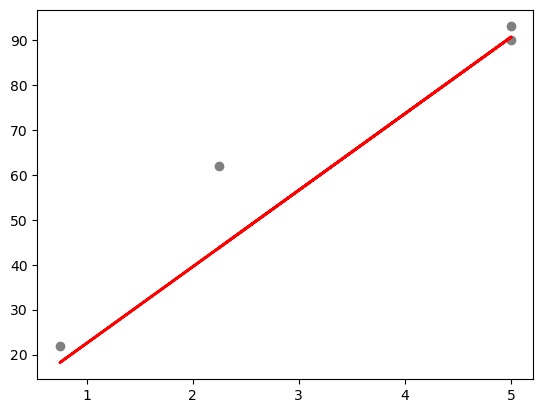

In [233]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

# Задание:
Постройте модель линейной регрессии для произвольных данных из двух 
столбцов. Для примера можно взять точечную зависимость заработной платы от 
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
from sklearn.linear_model import LinearRegression

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

regressor = LinearRegression()
regressor.fit(X, y)

print("Коэффициент наклона: ", regressor.coef_[0])
print("Пересечение оси y: ", regressor.intercept_)


Коэффициент наклона:  9449.962321455074
Пересечение оси y:  25792.20019866871


In [20]:
# Salary = 9449.96 * YearsExperience + 25792.20

import numpy as np

x_pred = np.array([[5]])
y_pred = regressor.predict(x_pred)

print("Заработная плата для человека с опытом работы 5 лет: ", y_pred[0])

Заработная плата для человека с опытом работы 5 лет:  73042.01180594409


# 1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию 
с двумя переменными. Однако, почти все реальные задачи имеют больше 
параметров. Линейная регрессия с участием нескольких переменных 
называется «множественной линейной регрессией» или многомерной 
линейной регрессией. Шаги для выполнения множественной линейной 
регрессии аналогичны шагам для простой . Разница заключается в оценке. 
Вы можете использовать множественную регрессию, чтобы узнать, какой 
фактор оказывает наибольшее влияние на прогнозируемый результат или 
как различные переменные связаны друг с другом.

# 1.3.1 Пример
Задача:
Для решения задачи множественной регрессии можно задействовать уже 
известный метод numpy.linalg.lstsq.


In [25]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]

X =[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
    [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
    [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

X = np.transpose (X) # transpose so input vectors 
X = np.c_[X, np.ones(X.shape[0])] # add bias term 
linreg = np.linalg.lstsq(X, y, rcond=None)[0] 
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn. 
Рассмотрим пример.
# 1.3.2 Пример
Задача:
Для данных из предыдущей задачи построить модель множественной 
линейной регрессии с использованием средств библиотеки sсikit-learn.
Решение:


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]

X =[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
    [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
    [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1',1:'x2',2:'x3'}, inplace = False)

frames = [df1,df2]
dataset = pd.concat([df1,df2],axis = 1, join = "inner")
dataset.head()


,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [28]:
# изучим данные
print(dataset.shape)
dataset.describe()


(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [35]:
# разделим данные
X = dataset[['x1','x2','x3']]
y = dataset['y']

# разделим данные на обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

# Для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() классов LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#выведем коэфициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [36]:
#Чтобы сделать прогнозы на тестовых данных, выполните слудющий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df


,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [40]:
# Последний шаг - оценить произвоидительно алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343065


# Задание
Задача:
Постройте модель множественной линейной регрессии для произвольных 
данных из нескольких столбцов. Для примера можно взять потребления 
газа (в миллионах галлонов) в 48 штатах США или набор данных о 
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты 
множественной регрессии. Постройте прогноз.
1. 
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# загружаем данные
dataset = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

dataset.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
# определяем матрицу признаков X
#X = data.drop(['quality'], axis=1)

# определяем целевую переменную y
#y = data['quality']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas - таблица, lkz нее нужно указыать iloc
    dataset.iloc[:,:11],# берем все колонки кроме последней в признаки
    dataset.iloc[:,11],# последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)

# создаем модель
model = LinearRegression()

# обучаем модель на данных
model.fit(X_train, y_train)

print("Коэффициенты регрессии:")
for i in range(len(X_train.columns)):
    print(X_train.columns[i], ": ", model.coef_[i])

print("Константа (intercept): ", model.intercept_)

Коэффициенты регрессии:
fixed acidity :  0.04802549537659873
volatile acidity :  -1.1792874211393198
citric acid :  -0.2627803577859751
residual sugar :  0.021146897786889305
chlorides :  -2.0240452244450293
free sulfur dioxide :  0.004791397215139836
total sulfur dioxide :  -0.003168775862201289
density :  -38.503957230324865
pH :  -0.29987009305154905
sulphates :  0.972394253924529
alcohol :  0.2570366471302656
Константа (intercept):  42.17323164280403


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred.astype(int)))
print(classification_report(y_test, y_pred.astype(int)))

[[  0   0   1   0   0   0]
 [  0   2   7   0   0   0]
 [  0  23 110   3   0   0]
 [  0   7  86  44   0   0]
 [  0   0   8  27   0   0]
 [  0   0   0   2   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.22      0.10         9
           5       0.52      0.81      0.63       136
           6       0.58      0.32      0.41       137
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00         2

    accuracy                           0.49       320
   macro avg       0.19      0.23      0.19       320
weighted avg       0.47      0.49      0.45       320



D:\Users\tohag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\tohag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\tohag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
new_data = pd.DataFrame({'fixed acidity': [7.2],
                         'volatile acidity': [0.45],
                         'citric acid': [0.36],
                         'residual sugar': [2.0],
                         'chlorides': [0.04],
                         'free sulfur dioxide': [19],
                         'total sulfur dioxide': [65],
                         'density': [0.994],
                         'pH': [3.3],
                         'sulphates': [0.68],
                         'alcohol': [11.5]})


In [39]:
# получаем прогноз
predicted_quality = model.predict(new_data)

# выводим прогноз
print(predicted_quality)


[6.09477778]


# Задание*
Задача: Экспериментально получены N − значений величины Y при 
различных значениях величины X. Построить полиномы первой и второй 
степени, аппроксимирующие результаты эксперимента, с применением 
метода наименьших квадратов. Результаты выводятся в виде таблиц 
значений и графиков, полученных полиномов.
Варианты заданий:
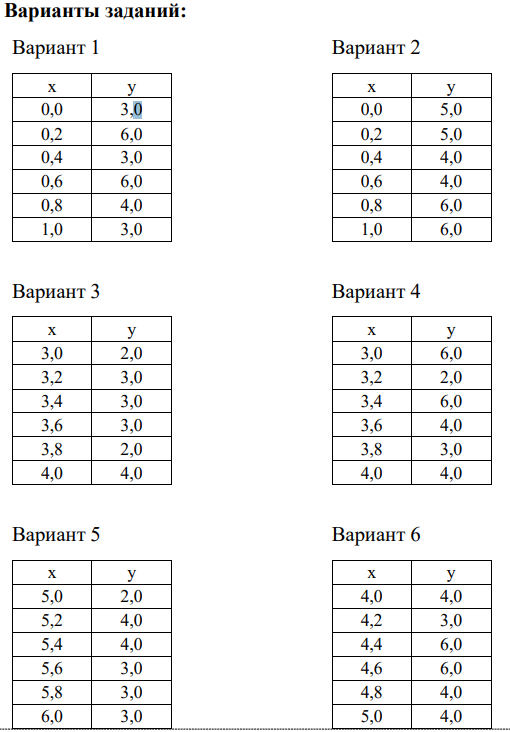
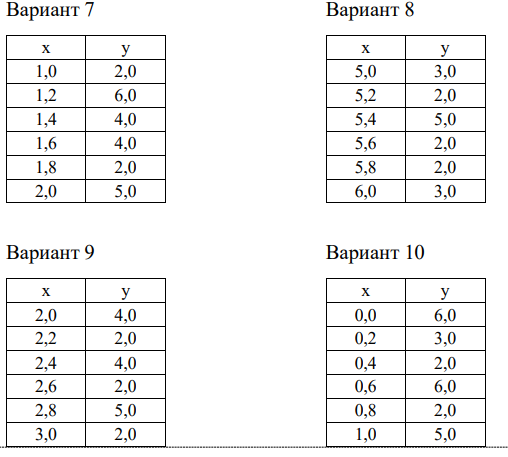

# Вариант 10

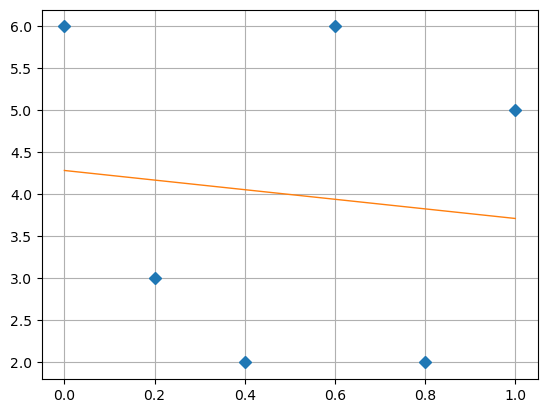

In [24]:
from numpy import *
from numpy.random import *

#генерируем случайные x и y

x = [0,0.2,0.4,0.6,0.8,1]
y = [6,3,2,6,2,5]

x = np.array(x)

M = vstack((x,ones(6))).T
s = np.linalg.lstsq(M,y,rcond = None)[0]
x_prec = linspace(0,1,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0]*x_prec +s[1],'-',lw=1)
plt.grid()

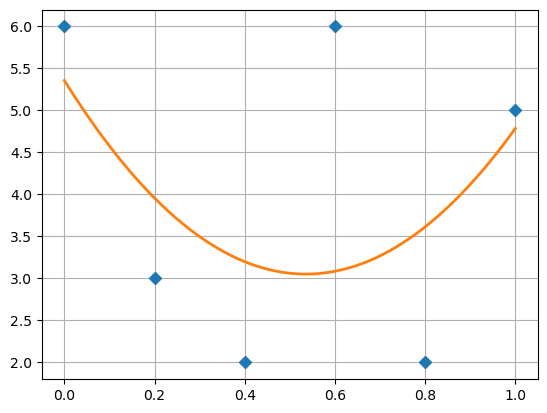

In [25]:
M = vstack((x**2,x,ones(6))).T

s = np.linalg.lstsq(M,y,rcond = None)[0]

x_prec = linspace(0,1,101)
# рисуем точки

plt.plot(x,y,'D')
#рисуем кривую вида y = ax**x +bx +c, подстовляя из решения коэффициенты s[0],s[1],s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec +s[2],'-',lw=2)
plt.grid()

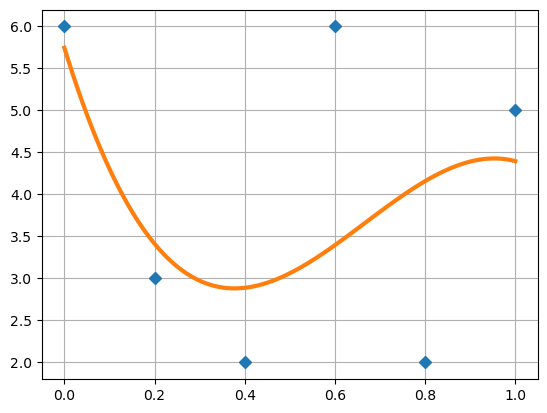

In [27]:
M = vstack((x**3,x**2,x,ones(6))).T
# находим коэффициеты при составляющих веттора m
s = np.linalg.lstsq(M,y,rcond = None)[0]

x_prec = linspace(0,1,101)

plt.plot(x,y,'D')
# рисует кривую вида y = ax^3 +bx^2 + cx +d, подставляя из решения коэффициенты s[0],s[1],s[2],s[3]
plt.plot(x_prec,s[0] * x_prec**3 + s[1]* x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()

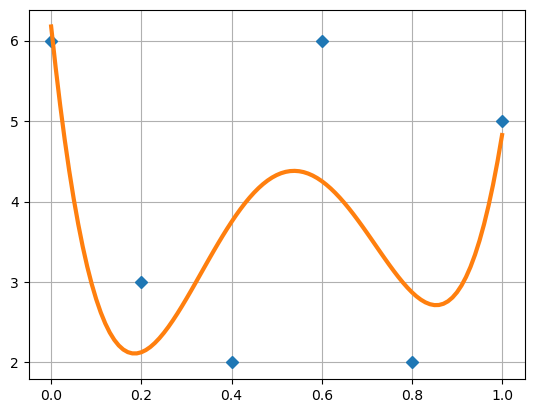

In [28]:
M = vstack((x**4,x**3,x**2,x,ones(6))).T
# находим коэффициеты при составляющих веттора m
s = np.linalg.lstsq(M,y,rcond = None)[0]

x_prec = linspace(0,1,101)

plt.plot(x,y,'D')
# рисует кривую вида y = ax^4 +bx^3 +cx^2 + dx +e, подставляя из решения коэффициенты s[0],s[1],s[2],s[3],s[4]
plt.plot(x_prec,s[0] * x_prec**4 + s[1]* x_prec**3 + s[2]*x_prec**2 + s[3]*x_prec+s[4], '-', lw = 3)
plt.grid()

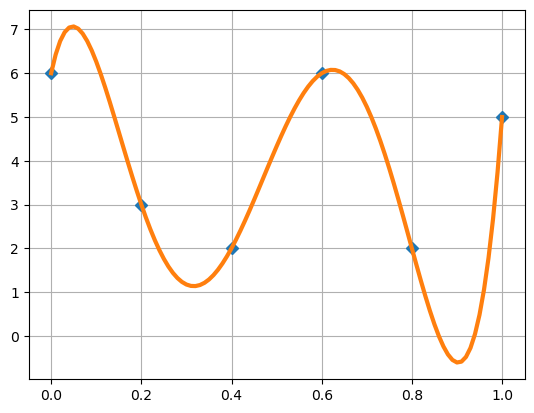

In [36]:
M = vstack((x**5,x**4,x**3,x**2,x,ones(6))).T
# находим коэффициеты при составляющих веттора m
s = np.linalg.lstsq(M,y,rcond = None)[0]

x_prec = linspace(0,1,101)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**5 + s[1] * x_prec**4 + s[2]* x_prec**3 + s[3]*x_prec**2 + s[4]*x_prec+s[5], '-', lw = 3)
plt.grid()